I am calibrating the Liquid Drop Model (LDM) using experimental binding energy data. The LDM estimates the binding energy of a nucleus with a given neutron number N and proton number Z. 

My strategy is to:

1. Fit the model using experimental data by adjusting the model parameters a_v, a_s, a_A, a_C (volume, surface, asymmetry, and Coulomb terms).

2. Evaluate the quality of the fit by checking the residuals (the difference between the experimental binding energies and the model predictions).

3. Minimize the residuals by finding the optimal parameters that make the model as close as possible to the experimental data.


Volume term: Accounts for the strong nuclear force acting between nucleons.

Surface term: Accounts for surface effects—nucleons on the surface interact less.

Asymmetry term: Accounts for the energy penalty if the neutron-to-proton ratio is far from 1.

Coulomb term: Accounts for the repulsive electrostatic force between protons.

In [1]:
import numpy as np
from scipy.optimize import curve_fit, minimize
import matplotlib.pyplot as plt

Optimized Parameters from curve_fit:
Volume term (a_V): 10.449955586133363
Surface term (a_S): 14.205689401603468
Asymmetry term (a_A): 5.379369022494347
Coulomb term (a_C): 0.490097444708814

Optimized Parameters from minimize:
Volume term (a_V): 10.44995829211468
Surface term (a_S): 14.205694528533135
Asymmetry term (a_A): 5.3793775238497155
Coulomb term (a_C): 0.4900976541152475


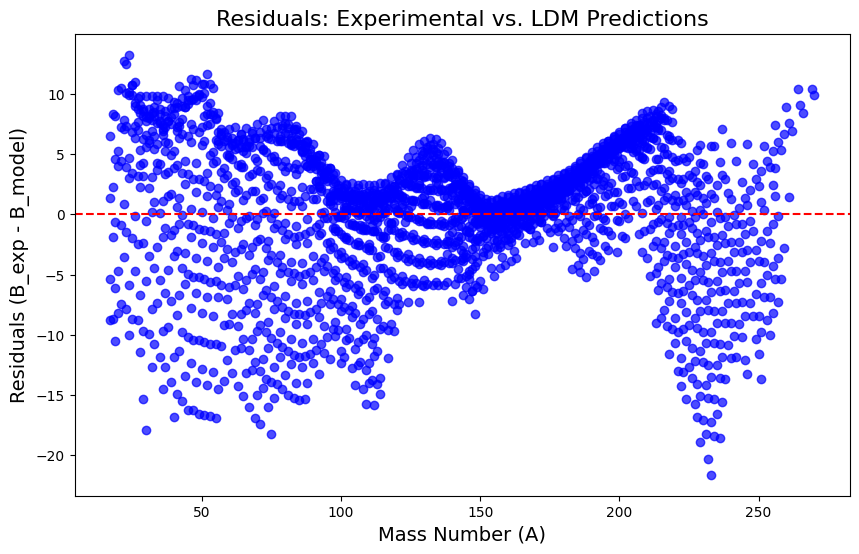

In [8]:
data = np.loadtxt('Masses2016.txt', skiprows=1)
filtered_data = data[data[:, 0] + data[:, 1] > 16]  # A = N + Z > 16

# Extract variables from the data
N = filtered_data[:, 0]  # Neutron number
Z = filtered_data[:, 1]  # Proton number
B_exp = filtered_data[:, 2]  # Experimental binding energy

def LDM(params,x): #This function implements the LDM equation to estimate the binding energy for given parameters. It will return a predicted binding energy given N, Z, and the four parameters
    #x = (n,z)
    #params= parameters (volume, surface, asymmetry, Coulomb)
    
    n=x[0] 
    z=x[1]
    
    return params[0]*(n+z) - params[1]*(n+z)**(2/3) - params[2]*((n-z)**2/(n+z)) - params[3]*((z**2)/((n+z)**(1/3)))
    #params[0]*(n+z): strong nuclear forces bind nucleons, and more nucleons result in stronger binding energy.
    #- params[1]*(n+z)**(2/3): Nucleons on the surface interact with fewer neighbors, reducing binding energy.
    #- params[2]*((n-z)**2/(n+z)): This term penalizes the binding energy if the number of neutrons and protons are very different because it is less stable
    #- params[3]*((z**2)/((n+z)**(1/3))): This term accounts for the repulsive electrostatic force between protons, which reduces binding energy.

def LDM_wrapper(x, a_V, a_S, a_A, a_C): #lets curve_fit work properly
    params = [a_V, a_S, a_A, a_C]
    return LDM(params, x)

x_data = (N, Z)  

initial_guess = [15, 18, 23, 0.7]  #Initial guesses for parameters
params_opt, params_cov = curve_fit(LDM_wrapper, x_data, B_exp, p0=initial_guess)

print("Optimized Parameters from curve_fit:")
print(f"Volume term (a_V): {params_opt[0]}")
print(f"Surface term (a_S): {params_opt[1]}")
print(f"Asymmetry term (a_A): {params_opt[2]}")
print(f"Coulomb term (a_C): {params_opt[3]}")

def cost_function(params):
    B_model = LDM(params, (N, Z))  #Model predictions
    residuals = B_exp - B_model  #Residuals
    return np.sum(residuals ** 2)  #Sum of squared residuals

#Minimize the cost function
result = minimize(cost_function, initial_guess, method='Nelder-Mead')

print("\nOptimized Parameters from minimize:")
print(f"Volume term (a_V): {result.x[0]}")
print(f"Surface term (a_S): {result.x[1]}")
print(f"Asymmetry term (a_A): {result.x[2]}")
print(f"Coulomb term (a_C): {result.x[3]}")

B_model = LDM(result.x, (N, Z))  #Model predictions with optimized parameters
residuals = B_exp - B_model

plt.figure(figsize=(10, 6))
plt.scatter(N + Z, residuals, marker='o', color='b', alpha=0.7)
plt.axhline(0, color='r', linestyle='--', linewidth=1.5)
plt.xlabel('Mass Number (A)', fontsize=14)
plt.ylabel('Residuals (B_exp - B_model)', fontsize=14)
plt.title('Residuals: Experimental vs. LDM Predictions', fontsize=16)
plt.show()


The optimized parameters from both methods are very similar which show that the optimization process works as intended.

## Interpretation:

This suggests that the LDM is underestimating binding energies for nuclei with intermediate mass numbers (A ≈ 100–150) and overestimating for both light nuclei (A < 50) and very heavy nuclei (A > 200).
This systematic trend indicates that the simple LDM does not fully capture all the complexities of nuclear structure.
